## Sampling of Data

In [1]:
import pandas as pd

# read the data from tsv file
multimodal_data = pd.read_csv('multimodal_train.tsv', sep='\t')
comment_data = pd.read_csv('all_comments.tsv', sep='\t')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12228\437766216.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  comment_data = pd.read_csv('all_comments.tsv', sep='\t')


In [2]:
multimodal_data.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


In [3]:
comment_data.head()

,Unnamed: 0,id,author,body,isTopLevel,parent_id,submission_id,ups
0,0,f4deplg,Haus42,"Scroll, scroll, scroll. Pause. Scroll back u...",True,t3_dkdml1,dkdml1,162.0
1,1,f4d79bi,PotatoPrince84,A lot of the people who felt quite strongly ab...,True,t3_dkdml1,dkdml1,84.0
2,2,f4ddmlk,MadeToAchieveBalance,T H E S P H E R E S H A L L R I S E A ...,True,t3_dkdml1,dkdml1,34.0
3,3,f4dknfn,MrBigRed,All hail the cube of justice,True,t3_dkdml1,dkdml1,9.0
4,4,f4dgdur,burritosenior,That is glorious.,True,t3_dkdml1,dkdml1,4.0


#### Sampling 60,000 rows from dataset

In [4]:
# Perform random sampling
sampled_data = multimodal_data.sample(n=60000, random_state=42)

# write the sampled data to a new tsv file
sampled_data.to_csv('sample_multimodal_train.tsv', sep='\t', index=False)

In [5]:
# filter the comments data based on the sampled data
sampled_comments = comment_data[comment_data['submission_id'].isin(sampled_data['id'])]

# write the filtered comments data to a new tsv file
sampled_comments.to_csv('sample_all_comments.tsv', sep='\t', index=False)

## Preprocessing of Data

#### Read The Sampled Dataset

In [6]:
import pandas as pd

# read final multimodal data
data = pd.read_csv('sample_multimodal_train.tsv', sep='\t')
comments = pd.read_csv('sample_all_comments.tsv', sep='\t')

In [7]:
print("Initial data shape:", data.shape)
print("Columns and their data types:\n", data.dtypes)

Initial data shape: (60000, 16)
Columns and their data types:
 author                   object
clean_title              object
created_utc             float64
domain                   object
hasImage                   bool
id                       object
image_url                object
linked_submission_id     object
num_comments            float64
score                     int64
subreddit                object
title                    object
upvote_ratio            float64
2_way_label               int64
3_way_label               int64
6_way_label               int64
dtype: object


In [8]:
print("\nMissing values per column:\n", data.isnull().sum())
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of missing values per column:\n", missing_percentage[missing_percentage > 0])


Missing values per column:
 author                   3123
clean_title                 0
created_utc                 0
domain                  17910
hasImage                    0
id                          0
image_url                 158
linked_submission_id    42090
num_comments            17910
score                       0
subreddit                   0
title                       0
upvote_ratio            17910
2_way_label                 0
3_way_label                 0
6_way_label                 0
dtype: int64

Percentage of missing values per column:
 author                   5.205000
domain                  29.850000
image_url                0.263333
linked_submission_id    70.150000
num_comments            29.850000
upvote_ratio            29.850000
dtype: float64


In [9]:
data['created_utc'] = pd.to_datetime(data['created_utc'], unit='s', errors='coerce')
data['year'] = data['created_utc'].dt.year
data['month'] = data['created_utc'].dt.month
data['day'] = data['created_utc'].dt.day
data['day_of_week'] = data['created_utc'].dt.dayofweek

#### Dropping useless columns

In [10]:
# drop image_url, linked_submission_id, 3_way_label, 6_way_label from data
data.drop(['image_url', 'linked_submission_id', '3_way_label', '6_way_label', 'hasImage', 'day_of_week'], axis=1, inplace=True)

# drop isTopLevel, parent_id, unnamed: 0 from comments
comments.drop(['isTopLevel', 'parent_id', 'Unnamed: 0'], axis=1, inplace=True)

In [11]:
# print columns and their data types
print("\nColumns and their data types:\n", data.dtypes)



Columns and their data types:
 author                  object
clean_title             object
created_utc     datetime64[ns]
domain                  object
id                      object
num_comments           float64
score                    int64
subreddit               object
title                   object
upvote_ratio           float64
2_way_label              int64
year                     int32
month                    int32
day                      int32
dtype: object


In [12]:
# print columns and their data types
print("\nColumns and their data types:\n", comments.dtypes)


Columns and their data types:
 id                object
author            object
body              object
submission_id     object
ups              float64
dtype: object


#### Dropping duplicate values

In [13]:
data.drop_duplicates(inplace=True)
comments.drop_duplicates(inplace=True)

In [14]:
# replace missing num_comments with 0
data['num_comments'].fillna(0, inplace=True)

numerical_columns = ['num_comments', 'score', 'upvote_ratio']
categorical_columns = ['author', 'subreddit', 'clean_title']

# fill missing values in numerical columns with median
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# fill missing values in categorical columns with empty string
data[categorical_columns] = data[categorical_columns].fillna('')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12228\1115253735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['num_comments'].fillna(0, inplace=True)


In [15]:
# write the cleaned data to a new tsv file
data.to_csv('final_multimodal_train.tsv', sep='\t', index=False)
comments.to_csv('final_all_comments.tsv', sep='\t', index=False)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

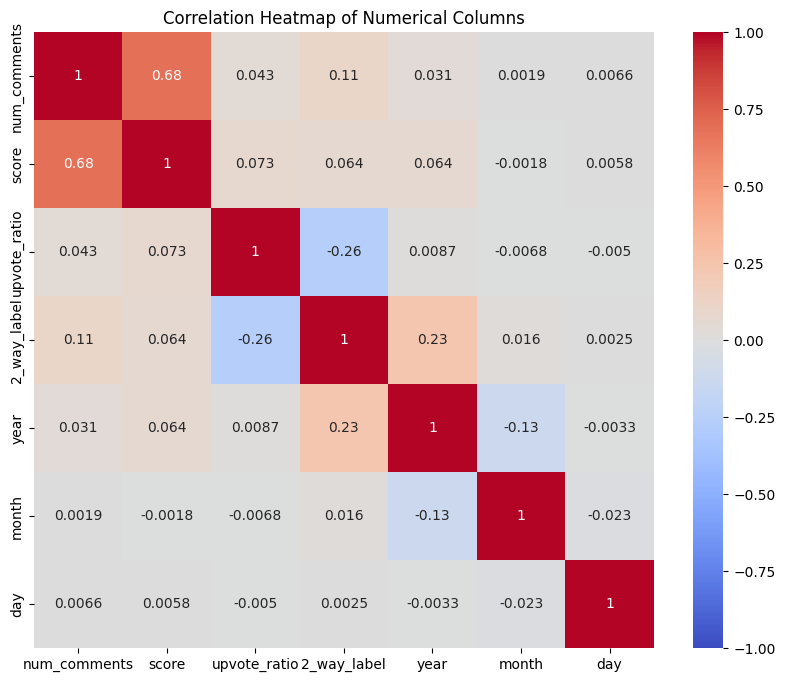

In [17]:
# plot a correlation heatmap of the numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
num_df = data.select_dtypes(include=['number'])

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

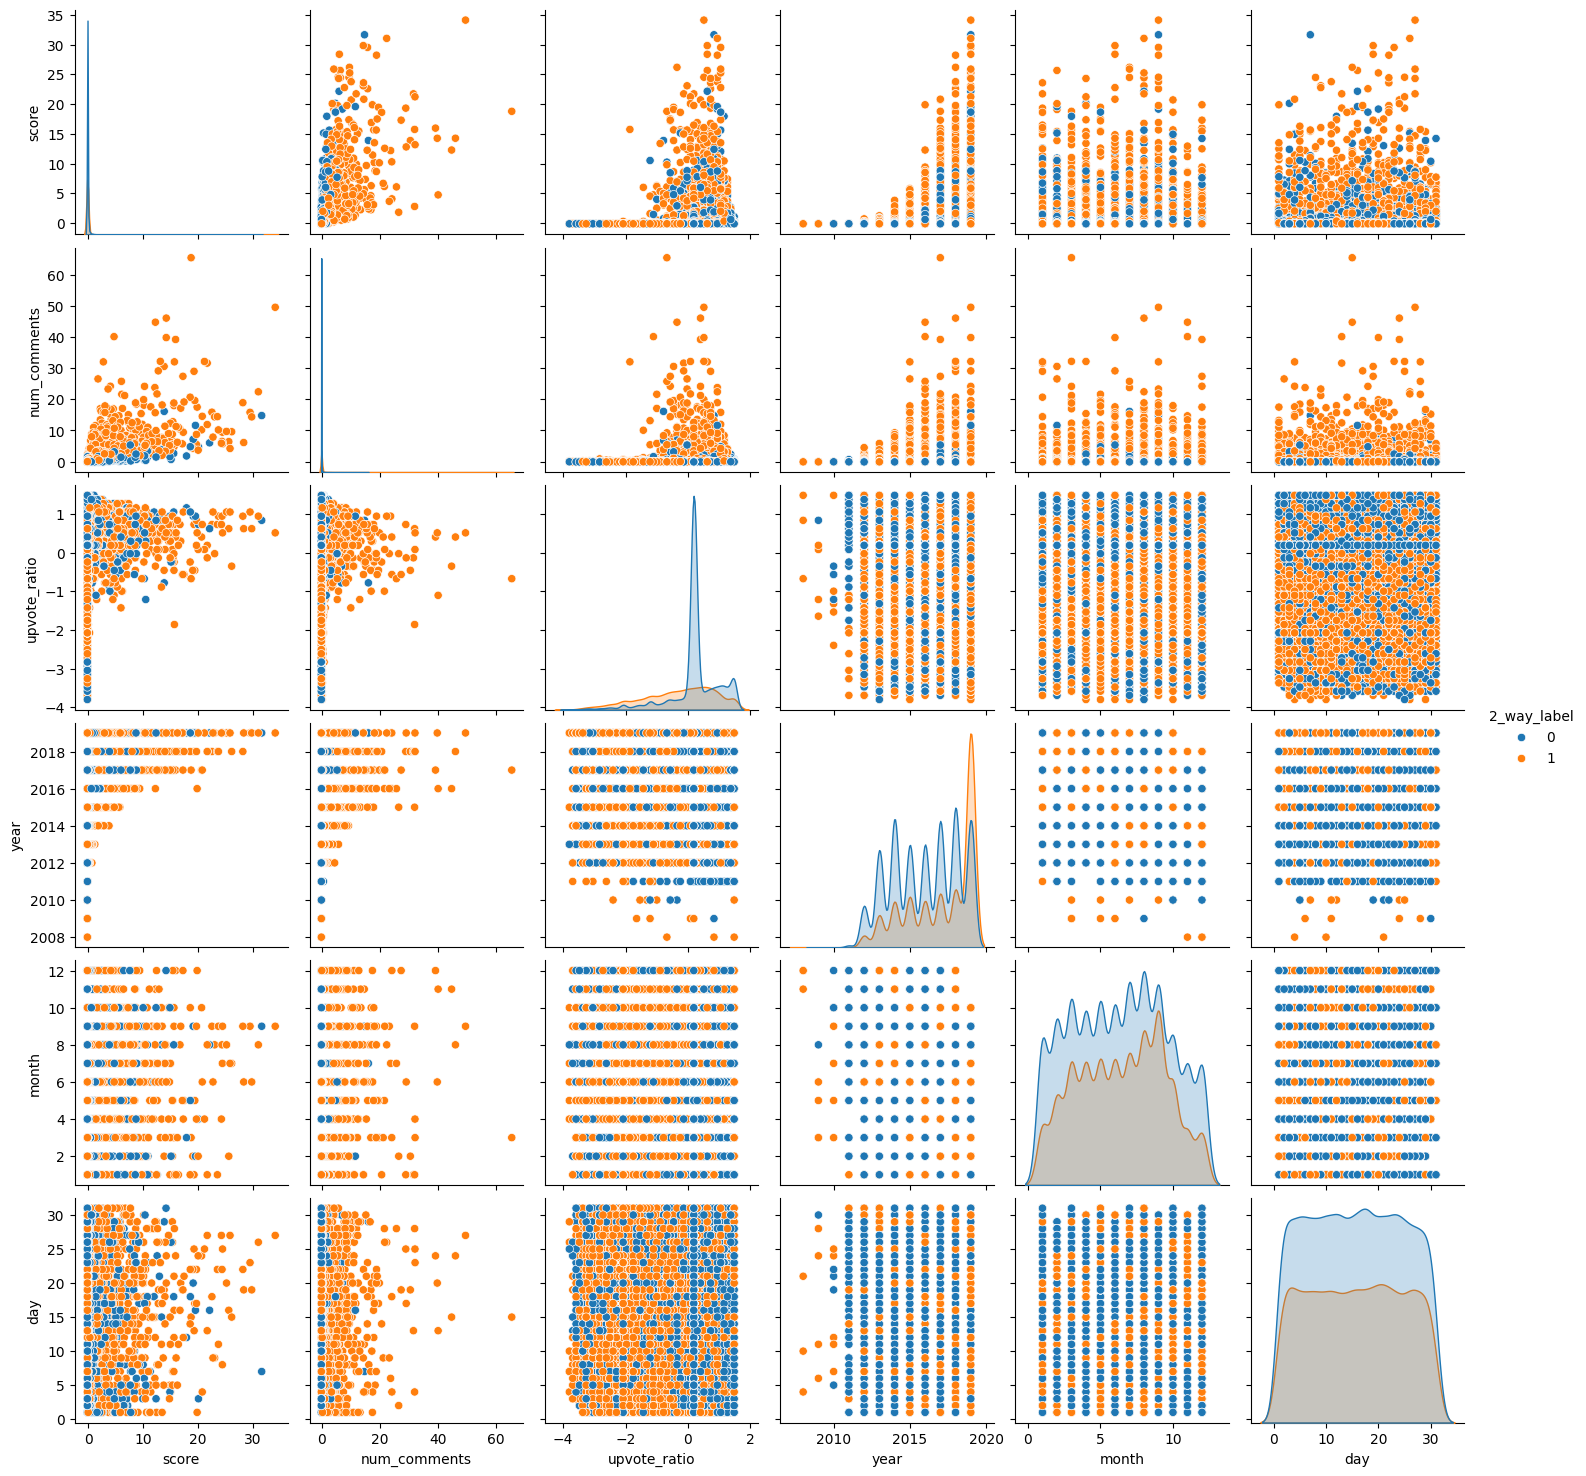

In [18]:
sns.pairplot(data[['score', 'num_comments', 'upvote_ratio', 'year', 'month', 'day', '2_way_label']], hue='2_way_label')
plt.show()